In [1]:
import json

In [2]:
json_file= open("../data/results/test 2/scores_info.txt", "r") 
scores_info = json.load(json_file)

In [3]:
scores_info['GRS'] = {'mean': 0.668, 'std': 0.002}
scores_info['RS'] = {'mean': 0.666, 'std': 0.002} #from first experiment 

In [4]:
scores_info

{'GRS_100': {'mean': 0.6680651354998307, 'std': 0.0013008025390191303},
 'RS_100': {'mean': 0.6627090283296673, 'std': 0.0020875533780410765},
 'GRS_50': {'mean': 0.6684343127525796, 'std': 0.0010214373531322479},
 'RS_50': {'mean': 0.6610820315997675, 'std': 0.0019331418179632512},
 'GRS_25': {'mean': 0.6684685619701072, 'std': 0.0013655312193986838},
 'RS_25': {'mean': 0.658642748941135, 'std': 0.0020499179251756636},
 'GRS_10': {'mean': 0.6680433906486641, 'std': 0.0010225089107698568},
 'RS_10': {'mean': 0.6555108401569943, 'std': 0.0024108997034330486},
 'GRS': {'mean': 0.668, 'std': 0.002},
 'RS': {'mean': 0.666, 'std': 0.002}}

In [5]:
json_file= open("../data/results/test 2/iters_info.txt", "r") 
iters_info = json.load(json_file)

In [6]:
from matplotlib import pyplot as plt

In [7]:
iters_labels = list(iters_info.keys())
iters_info = list(iters_info.values())

means_iters = []
std_iters = []

for experiment in iters_info:
    means_iters.append(experiment['mean'])
    std_iters.append(experiment['std'])

In [8]:
scores_labels = list(scores_info.keys())
scores_info = list(scores_info.values())

means_scores = []
std_scores = []

for experiment in scores_info:
    means_scores.append(experiment['mean'])
    std_scores.append(experiment['std'])

In [9]:
def autolabel(rects, add=0):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()+add
        ax.annotate('{}'.format(round(height-add,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

In [10]:
import seaborn as sns
sns.set()

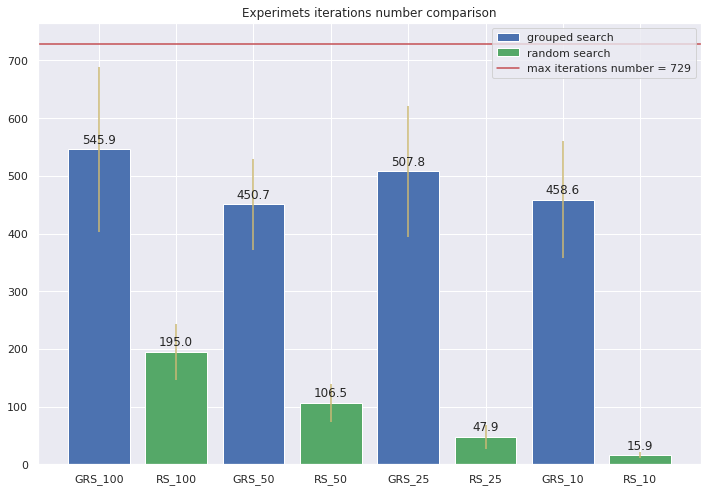

In [11]:
fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(range(len(iters_labels)), means_iters,
        yerr=std_iters, align="center", ecolor = 'y', color = ('b','g'))

ax.set_xticks(range(0,len(iters_labels)))
ax.set_xticklabels(iters_labels)

line = ax.axhline(729, color='r', label = 'max_iter_num')
autolabel(rects1)
ax.set_title('Experimets iterations number comparison')
plt.legend(handles= (rects1[::2],rects1[1::2],line),
           labels = ('grouped search', 'random search', 'max iterations number = 729'),
           loc = 'upper right')
fig.tight_layout()
plt.savefig("../graphs/test 2/iter_comp.jpg")
plt.show()

In [12]:
grid_and_default = (0.659, 0.64)

In [13]:
import numpy as np

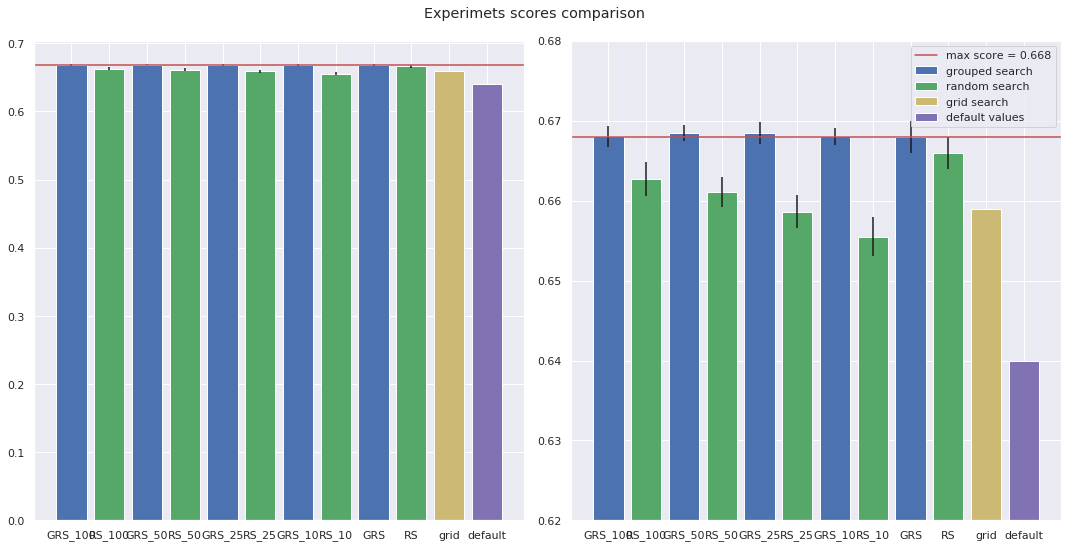

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))
full_scores_labels = scores_labels.copy()
full_scores_labels.extend(['grid', 'default'])

rects2 = axs[0].bar(range(len(scores_labels)), means_scores,
        yerr=std_scores, align="center", ecolor = 'k', color = ('b','g'))

rects2_and_half = axs[0].bar(range(len(scores_labels), 
                                   len(scores_labels)+len(grid_and_default)), 
                             grid_and_default,
                             align="center", color = ('y', 'm'))


axs[0].set_xticks(range(0,len(full_scores_labels)))
axs[0].set_xticklabels(full_scores_labels)
line = axs[0].axhline(0.668, color='r')


rects3 = axs[1].bar(range(len(scores_labels)), means_scores,
        yerr=std_scores, align="center", ecolor = 'k', color = ('b','g'))

rects3_and_half = axs[1].bar(range(len(scores_labels), 
                                   len(scores_labels)+len(grid_and_default)), 
                             grid_and_default,
                             align="center", color = ('y', 'm'))

axs[1].set_xticks(range(0,len(full_scores_labels)))
axs[1].set_xticklabels(full_scores_labels)
line = axs[1].axhline(0.668, color='r')
axs[1].set_ylim(0.62, 0.68)

plt.legend(handles= (line, rects2[::2], rects2[1::2], 
                     rects2_and_half[0], rects2_and_half[1]),
           labels = ('max score = 0.668', 'grouped search', 'random search', 
                    'grid search', 'default values'),
           loc = 'best')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.suptitle('Experimets scores comparison')
plt.savefig("../graphs/test 2/scores_comp.jpg")
plt.show()